In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [3]:
input_shape = (28, 28, 1)
X_train = X_train0.reshape(X_train0.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')/255
X_test = X_test0.reshape(X_test0.shape[0], 28, 28, 1)
X_test = X_test.astype('float32')/255

In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [6]:
from keras.utils import to_categorical
y_train_cat = keras.utils.to_categorical(y_train0, 10)
y_test_cat = keras.utils.to_categorical(y_test0, 10)

In [7]:
model_log = model.fit(X_train, y_train_cat,batch_size=32,epochs=20,verbose=1)

Epoch 1/20
60000/60000 [==============================] - 42s 692us/step - loss: 0.1580 - acc: 0.9524
Epoch 2/20
60000/60000 [==============================] - 42s 705us/step - loss: 0.0535 - acc: 0.9842
Epoch 3/20
60000/60000 [==============================] - 43s 721us/step - loss: 0.0365 - acc: 0.9894
Epoch 4/20
60000/60000 [==============================] - 43s 720us/step - loss: 0.0260 - acc: 0.9923
Epoch 5/20
60000/60000 [==============================] - 43s 723us/step - loss: 0.0194 - acc: 0.9940
Epoch 6/20
60000/60000 [==============================] - 43s 722us/step - loss: 0.0137 - acc: 0.9959
Epoch 7/20
60000/60000 [==============================] - 43s 724us/step - loss: 0.0100 - acc: 0.9971
Epoch 8/20
60000/60000 [==============================] - 44s 726us/step - loss: 0.0072 - acc: 0.9981
Epoch 9/20
60000/60000 [==============================] - 44s 726us/step - loss: 0.0051 - acc: 0.9988
Epoch 10/20
60000/60000 [==============================] - 44s 726us/step - loss: 

dict_keys(['loss', 'acc'])


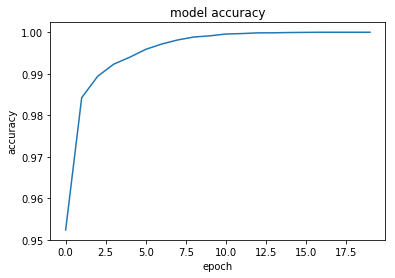

In [9]:
import matplotlib.pyplot as plt
print(model_log.history.keys())
plt.plot(model_log.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [10]:
# serialize weights to HDF5
model.save_weights("model_digit.h5")

In [12]:
model.load_weights("model_digit.h5")

In [13]:
score = model.evaluate(X_test, y_test_cat, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 148us/step
Test loss: 0.061745492941975365
Test accuracy: 0.9877
